## make_blobs 产生随机数据然后进行二分类，进而绘制ROC曲线

#### import 库

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
from sklearn.metrics import roc_curve

#### 数据集构建

In [27]:
data_x,data_y = make_blobs(n_samples=(5000,700), cluster_std=[8,3])
x_train,x_test,y_train, y_test = train_test_split(data_x,data_y)

#### 模型训练

In [28]:
clf = SVC(gamma=0.09,probability=True).fit(x_train, y_train)

#### 绘制ROC曲线

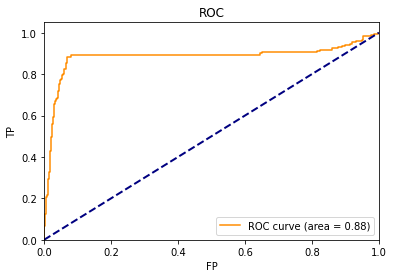

In [29]:
auc = roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
# auc = roc_auc_score(y_test,clf.decision_function(X_test))
fpr,tpr, thresholds = roc_curve(y_test,clf.decision_function(x_test))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('suhan.jpg',dpi=800)
plt.show()